# **MIDTERM PROJECT**

## **Description**



1. Problem Description

This dataset involves predicting an individual's performance grade (class: A, B, C, D) based on physical attributes, fitness indicators, and demographic information. The dataset includes a range of metrics that represent health and physical fitness, such as age, gender, body fat percentage, blood pressure, grip strength, flexibility, and jump performance.The problem can be framed as a multiclass classification task, where the goal is to predict one of the four performance grades (A, B, C, D) based on the input features.

2. Potential use of the model

The model can be used to predict the body performance grade of an individual. Then Based on the predicted class, the user can be given a recommendation on how to improve their fitness and body composition.

---

## **Working Area**


## 2 - Import Libraries

In [42]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

pd.options.mode.chained_assignment = None  # default='warn'

# libbraries for preprocessing and modelling
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer

from sklearn.linear_model import LogisticRegression
from category_encoders import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

import warnings

warnings.filterwarnings("ignore")

import jupyter_black

jupyter_black.load()

## 3 - Data Loading

In [43]:
# Load the dataset

df = pd.read_csv("bodyPerformance.csv")
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [44]:
# Duplicate the dataset
df_ori = df.copy()

In [45]:
# rename specific column names
df.rename(
    columns={
        "height_cm": "height",
        "weight_kg": "weight",
        "body fat_%": "body_fat_pctg",
        "gripForce": "grip_force",
        "sit and bend forward_cm": "sit_and_bend_forward",
        "sit-ups counts": "sit_ups_counts",
        "broad jump_cm": "broad_jump",
    },
    inplace=True,
)

In [46]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   13393 non-null  float64
 1   gender                13393 non-null  object 
 2   height                13393 non-null  float64
 3   weight                13393 non-null  float64
 4   body_fat_pctg         13393 non-null  float64
 5   diastolic             13393 non-null  float64
 6   systolic              13393 non-null  float64
 7   grip_force            13393 non-null  float64
 8   sit_and_bend_forward  13393 non-null  float64
 9   sit_ups_counts        13393 non-null  float64
 10  broad_jump            13393 non-null  float64
 11  class                 13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [47]:
# Chech dataset statistical info
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,13393.0,NaN,NaN,NaN,36.775106,13.625639,21.0,25.0,32.0,48.0,64.0
gender,13393,2,M,8467,NaN,NaN,NaN,NaN,NaN,NaN,NaN
height,13393.0,NaN,NaN,NaN,168.559807,8.426583,125.0,162.4,169.2,174.8,193.8
weight,13393.0,NaN,NaN,NaN,67.447316,11.949666,26.3,58.2,67.4,75.3,138.1
body_fat_pctg,13393.0,NaN,NaN,NaN,23.240165,7.256844,3.0,18.0,22.8,28.0,78.4
diastolic,13393.0,NaN,NaN,NaN,78.796842,10.742033,0.0,71.0,79.0,86.0,156.2
systolic,13393.0,NaN,NaN,NaN,130.234817,14.713954,0.0,120.0,130.0,141.0,201.0
grip_force,13393.0,NaN,NaN,NaN,36.963877,10.624864,0.0,27.5,37.9,45.2,70.5
sit_and_bend_forward,13393.0,NaN,NaN,NaN,15.209268,8.456677,-25.0,10.9,16.2,20.7,213.0
sit_ups_counts,13393.0,NaN,NaN,NaN,39.771224,14.276698,0.0,30.0,41.0,50.0,80.0


In [48]:
df.isnull().sum()

age                     0
gender                  0
height                  0
weight                  0
body_fat_pctg           0
diastolic               0
systolic                0
grip_force              0
sit_and_bend_forward    0
sit_ups_counts          0
broad_jump              0
class                   0
dtype: int64

ALthough there are no missing values in the dataset, there are some of Zero values in some of numerical columns which indicate some individuals did not perform certain tests. This may be an indication of missing values.

In [49]:
print("Count of rows in diastolic with value 0 : ", df[df["diastolic"] == 0].shape[0])
print("Count of rows in systolic with value 0 : ", df[df["systolic"] == 0].shape[0])
print("Count of rows in grip_force with value 0 : ", df[df["grip_force"] == 0].shape[0])
print(
    "Count of rows in sit_ups_counts with value 0 : ",
    df[df["sit_ups_counts"] == 0].shape[0],
)
print("Count of rows in broad_jump with value 0 : ", df[df["broad_jump"] == 0].shape[0])

Count of rows in diastolic with value 0 :  1
Count of rows in systolic with value 0 :  1
Count of rows in grip_force with value 0 :  3
Count of rows in sit_ups_counts with value 0 :  125
Count of rows in broad_jump with value 0 :  10


We will treat Zero values as missing values for now so that will make it easier to apply missing value handling techniques later. We can also check or analyze the missingness.

In [50]:
# df.replace(0, np.nan, inplace=True)

In [51]:
df.isnull().sum()

age                     0
gender                  0
height                  0
weight                  0
body_fat_pctg           0
diastolic               0
systolic                0
grip_force              0
sit_and_bend_forward    0
sit_ups_counts          0
broad_jump              0
class                   0
dtype: int64

## 4 - Exploratory Data Analysis (EDA)

In [52]:
# Get Numerical Columns and Categorical Columns (original)
num_columns = df.select_dtypes(include=np.number).columns.tolist()
cat_columns = df.select_dtypes(include=["object"]).columns.tolist()

In [53]:
print(
    f"Numerical Columns : {len(num_columns)} columns \n-----------------------------------"
)
print(df[num_columns].nunique())

Numerical Columns : 10 columns 
-----------------------------------
age                       44
height                   467
weight                  1398
body_fat_pctg            527
diastolic                 89
systolic                 102
grip_force               550
sit_and_bend_forward     528
sit_ups_counts            81
broad_jump               245
dtype: int64


In [54]:
print(
    f"Categorical Columns : {len(cat_columns)} columns \n--------------------------------"
)
for i in cat_columns:
    cat = df[i].unique()
    print(f"{i} ({len(cat)}):", cat)
    print("----------------------------------------")

Categorical Columns : 2 columns 
--------------------------------
gender (2): ['M' 'F']
----------------------------------------
class (4): ['C' 'A' 'B' 'D']
----------------------------------------


### 1. Numerical Columns Data Distribution

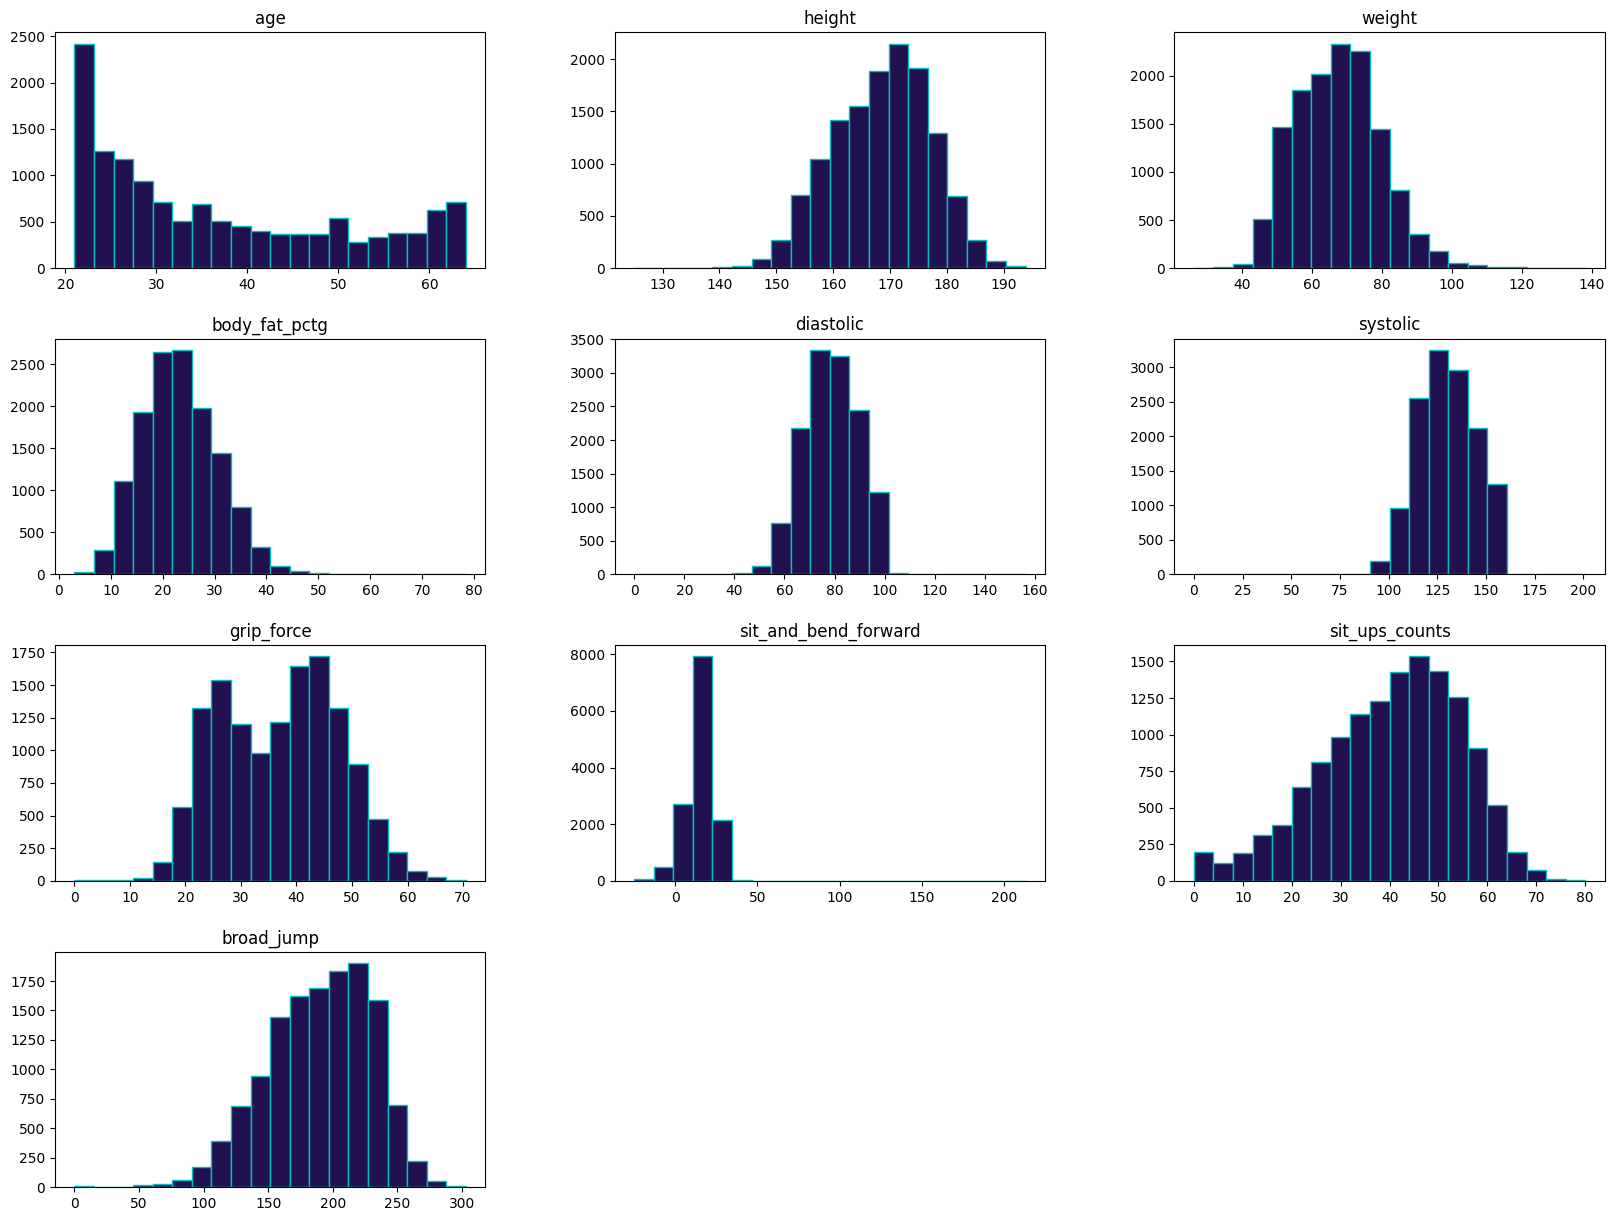

In [55]:
palette = itertools.cycle(sns.color_palette("magma"))

df.hist(bins=20, figsize=(20, 15), grid=False, color=next(palette), edgecolor="c")
plt.show()

From the histogram above, we can observe that:

1. The age of users in the dataset ranges from **20 to 65 years**, with the most common age group being **20-25 years**.
2. Users' height ranges from **125 to 193 cm**, with the most frequent height in the dataset being around **170 cm**.
3. Users' weight in the dataset falls between **26 and 138 kg**, with the most common weight being **70-75 kg**.
4. The percentage of body fat data shows that users with **20-25% body fat** are the most dominant.
5. The average diastolic blood pressure of users is **78**, and the average systolic blood pressure is **130**.
6. The average values for users' physical tests are:
   - **Grip force**: 36  
   - **Sit-and-bend-forward**: 15 cm  
   - **Sit-ups**: 39 repetitions  
   - **Broad jump**: 190 cm


### 2. Gender and Class Proportion

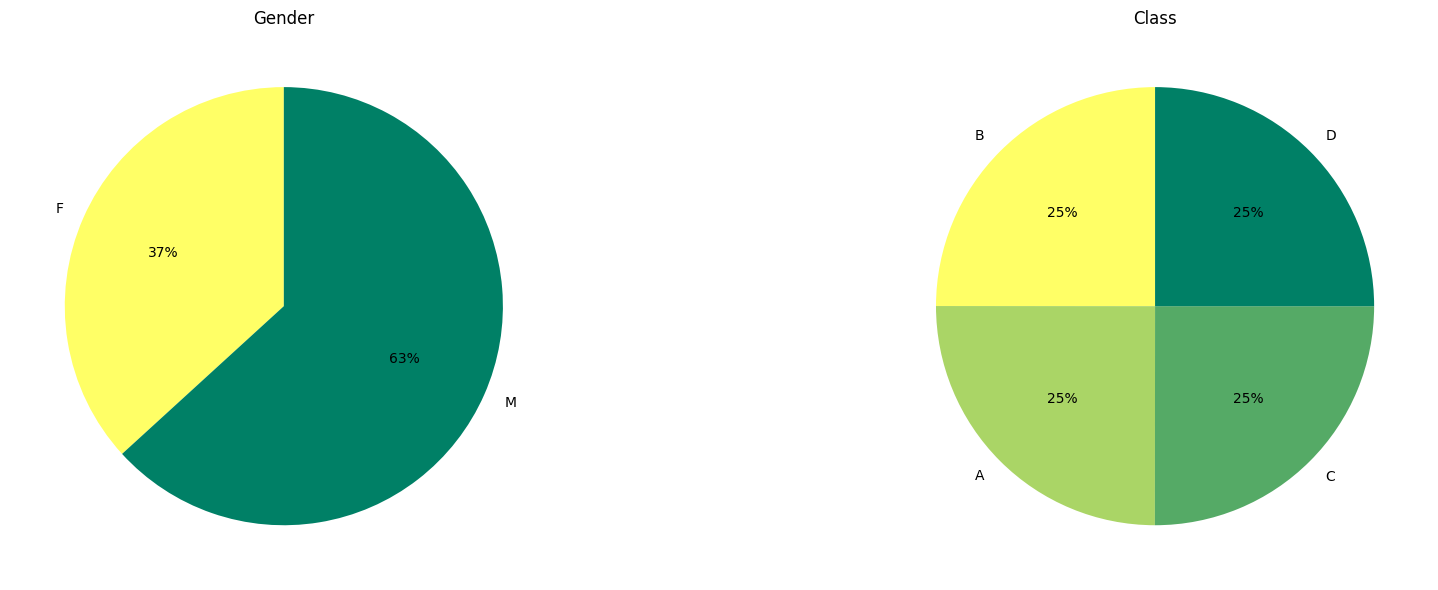

In [56]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 6))
df.groupby("gender")["gender"].count().sort_values().plot(
    kind="pie", autopct="%.0f%%", ax=ax[0], ylabel="", startangle=90, cmap="summer_r"
).set_title("Gender")
df.groupby("class")["class"].count().sort_values().plot(
    kind="pie", autopct="%.0f%%", ax=ax[1], ylabel="", startangle=90, cmap="summer_r"
).set_title("Class")
plt.tight_layout()
plt.show()

- The proportion of user gender is dominated by **Male** at **63%**, while the proportion of **Female** is **37%**.  
- Based on the proportion of classes/targets, it can be concluded that the labels in this dataset are **balanced**, with each class having a proportion of **25%**.


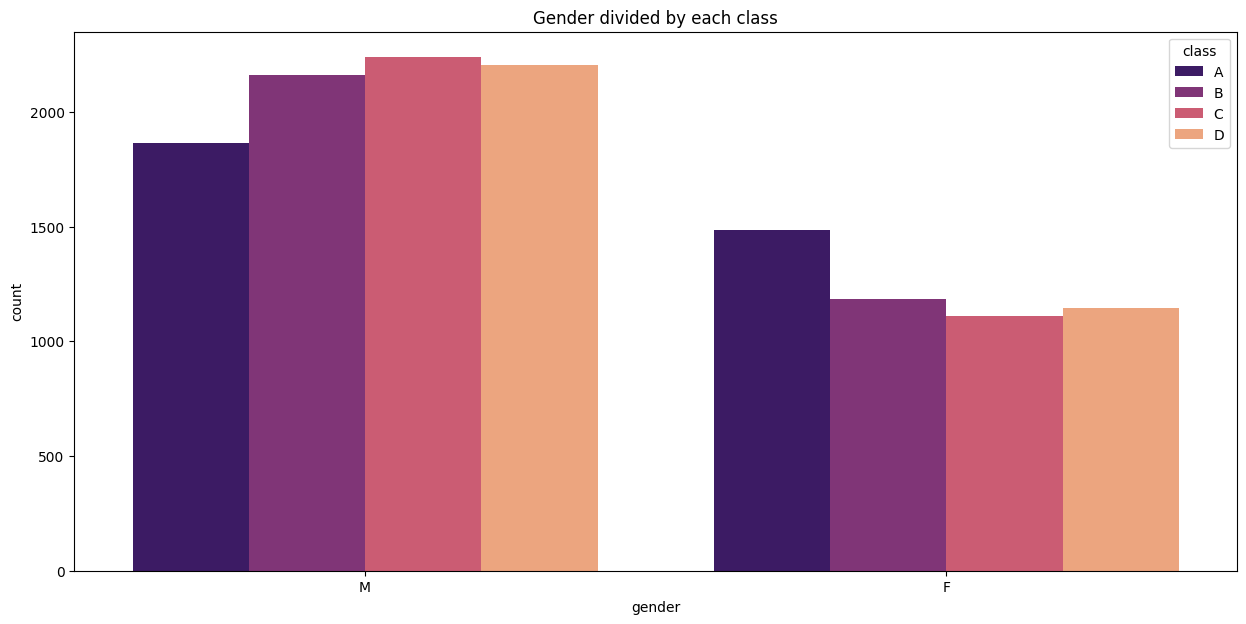

In [57]:
plt.figure(figsize=(15, 7))
sns.countplot(
    data=df, x="gender", hue=df["class"].sort_values(), palette="magma"
).set_title("Gender divided by each class")
plt.show()

**Note:**  
- **Class A** = Best  
- **Class B** = Fit  
- **Class C** = Normal  
- **Class D** = Not Good  

1. Overall, we can observe that the number of **males** in each body performance class is higher than **females**.  
2. However, when viewed by gender:  
  - The majority of **male users** have a **Normal** or **Not Good** body performance condition (Class C and D).  
  - For **females**, the majority of users fall into the **Best** body performance category (Class A).  


### 3. Melihat hubungan age vs height dan age vs weight

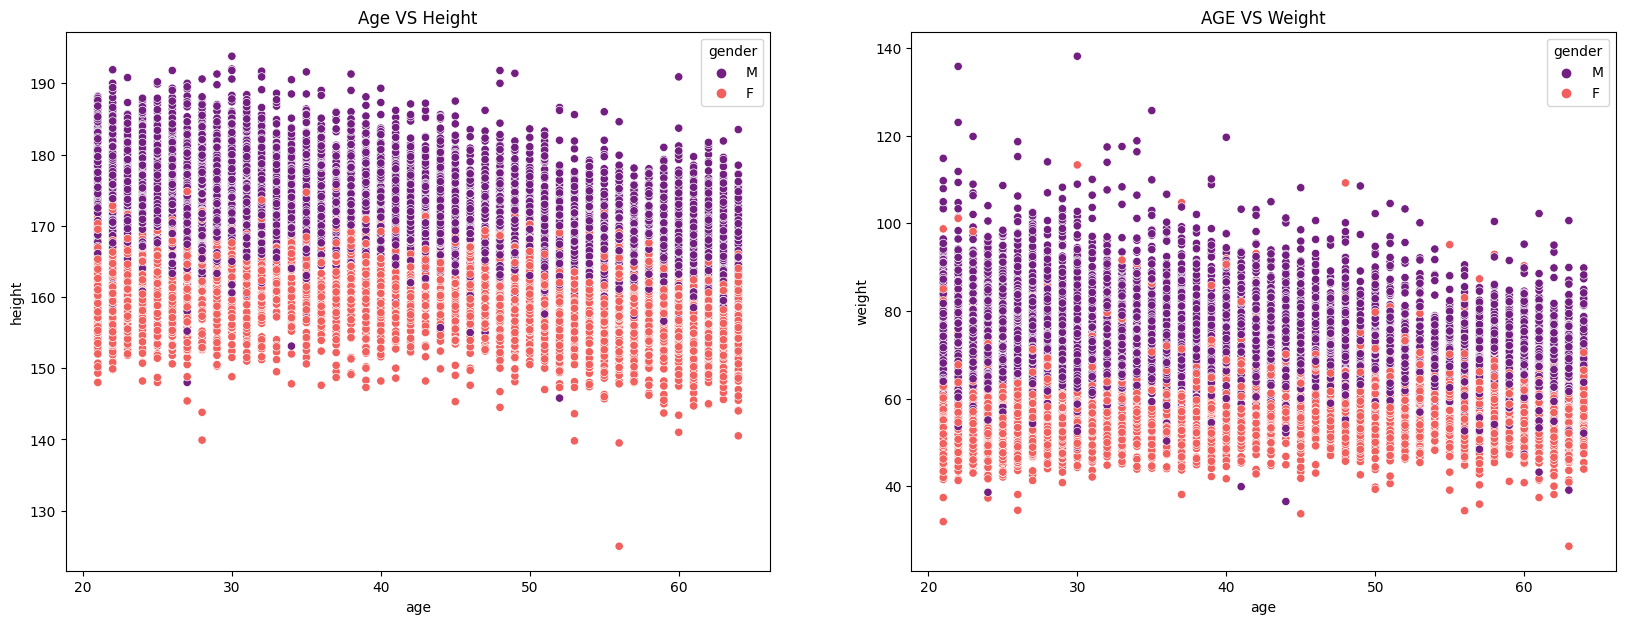

In [58]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 7))
sns.scatterplot(
    data=df,
    x="age",
    y="height",
    hue=df["gender"].sort_values(),
    palette="magma",
    ax=ax[0],
).set_title("Age VS Height")
sns.scatterplot(
    data=df,
    x="age",
    y="weight",
    hue=df["gender"].sort_values(),
    palette="magma",
    ax=ax[1],
).set_title("AGE VS Weight")
plt.show()

General Observations:

1. Both metrics show clear gender dimorphism (differences between males and females)
    - Males (purple) consistently show greater height than females (pink) across all age groups
    - Males generally show higher weights than females across age groups. Although there's much more variability in weight compared to height (more scattered points)
2. There's a slight downward trend in height with increasing age for both genders, possibly due to the aging process or older generations being slightly shorter.



### 4. Average of each class

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   13393 non-null  float64
 1   gender                13393 non-null  object 
 2   height                13393 non-null  float64
 3   weight                13393 non-null  float64
 4   body_fat_pctg         13393 non-null  float64
 5   diastolic             13393 non-null  float64
 6   systolic              13393 non-null  float64
 7   grip_force            13393 non-null  float64
 8   sit_and_bend_forward  13393 non-null  float64
 9   sit_ups_counts        13393 non-null  float64
 10  broad_jump            13393 non-null  float64
 11  class                 13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [60]:
class_ = (
    df.groupby(["class"])
    .agg(
        {
            # "class": "count",
            "age": "mean",
            "height": "mean",
            "weight": "mean",
            "body_fat_pctg": "mean",
            "diastolic": "mean",
            "systolic": "mean",
            "grip_force": "mean",
            "sit_and_bend_forward": "mean",
            "sit_ups_counts": "mean",
            "broad_jump": "mean",
        }
    )
    .round(1)
)
class_

,age,height,weight,body_fat_pctg,diastolic,systolic,grip_force,sit_and_bend_forward,sit_ups_counts,broad_jump
class,,,,,,,,,,
A,35.3,167.9,64.4,20.5,77.9,129.3,38.6,21.4,47.8,202.7
B,37.1,168.6,66.6,22.0,78.7,130.6,37.9,17.5,42.6,195.3
C,36.7,169.2,66.8,22.6,78.6,129.9,36.6,14.4,38.7,188.6
D,38.1,168.6,72.0,27.7,80.1,131.1,34.7,7.6,29.9,173.8


From the table above, we can see that:

1. Class A (BEST) consists of:
    - Users with an average age of 35.3 years (yougest group)
    - Average height of 167 cm
    - Average weight of 64.4 kg
    - Body fat percentage of 20.5%
    - Lowest blood pressure readings
        - Diastolic: 77.9 mmHg
        - Systolic: 129.3 mmHg


2. For Class D (Not GOOD) consists of:
    - Users with an average age of 38 years
    - Average height of 168.62 cm
    - Average weight of 71.99 kg
    - Body fat percentage of 27.7%

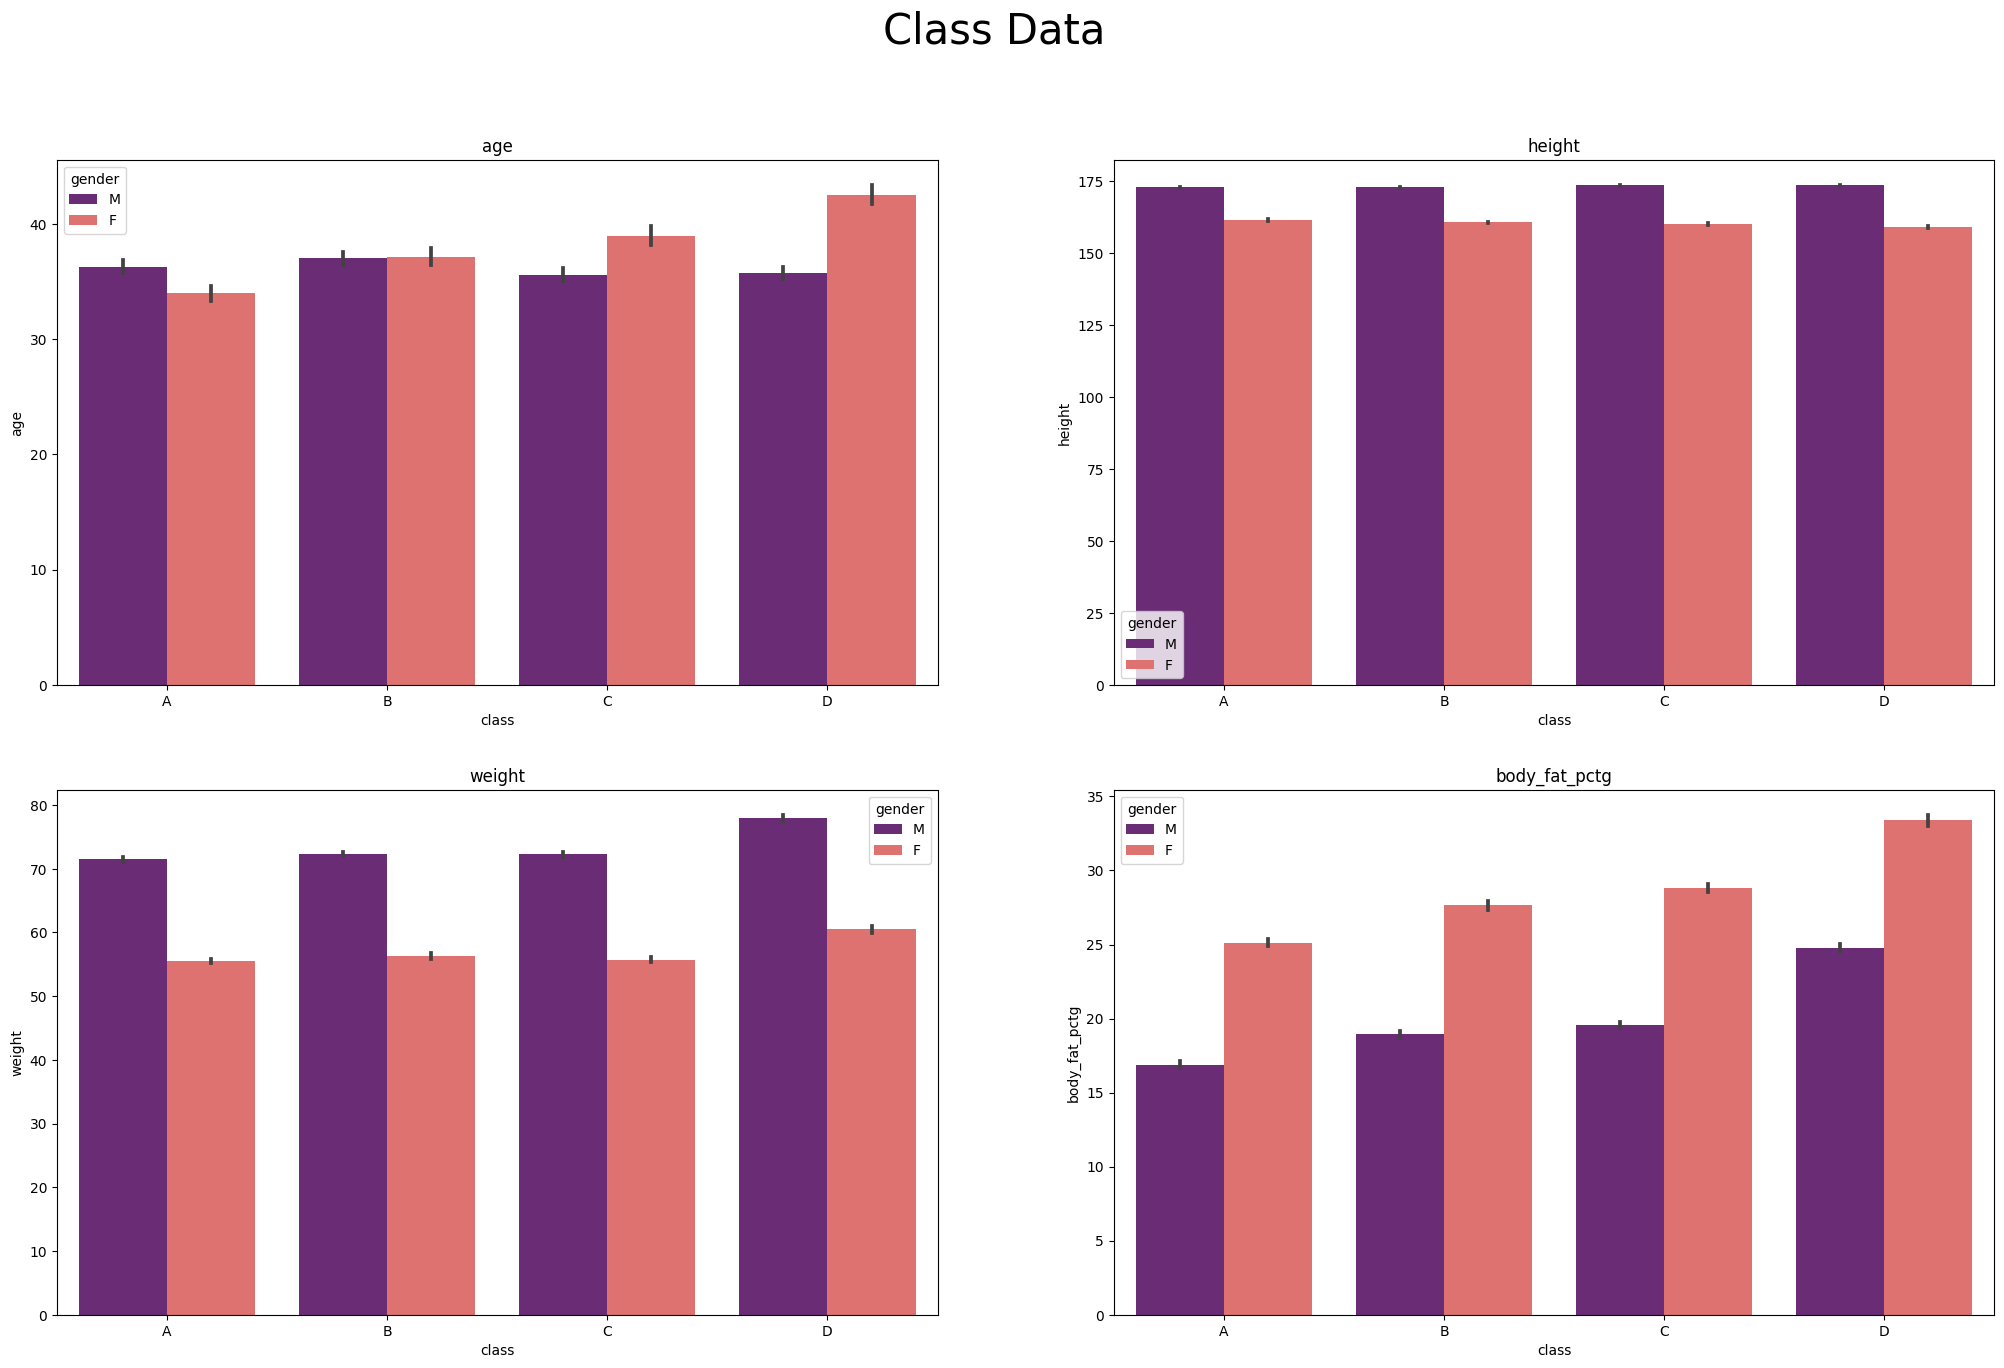

In [61]:
class_data = df[["class", "age", "height", "weight", "body_fat_pctg"]]

fig, ax = plt.subplots(2, 2, figsize=(25, 15))
fig.suptitle("Class Data", fontsize=30)
sns.barplot(
    data=class_data,
    x=class_data["class"].sort_values(),
    y="age",
    ax=ax[0, 0],
    hue=df["gender"],
    palette="magma",
).set_title("age")
sns.barplot(
    data=class_data,
    x=class_data["class"].sort_values(),
    y="height",
    ax=ax[0, 1],
    hue=df["gender"],
    palette="magma",
).set_title("height")
sns.barplot(
    data=class_data,
    x=class_data["class"].sort_values(),
    y="weight",
    ax=ax[1, 0],
    hue=df["gender"],
    palette="magma",
).set_title("weight")
sns.barplot(
    data=class_data,
    x=class_data["class"].sort_values(),
    y="body_fat_pctg",
    ax=ax[1, 1],
    hue=df["gender"],
    palette="magma",
).set_title("body_fat_pctg")
plt.show()

### 6. Dataset distribution and outliers with boxplot

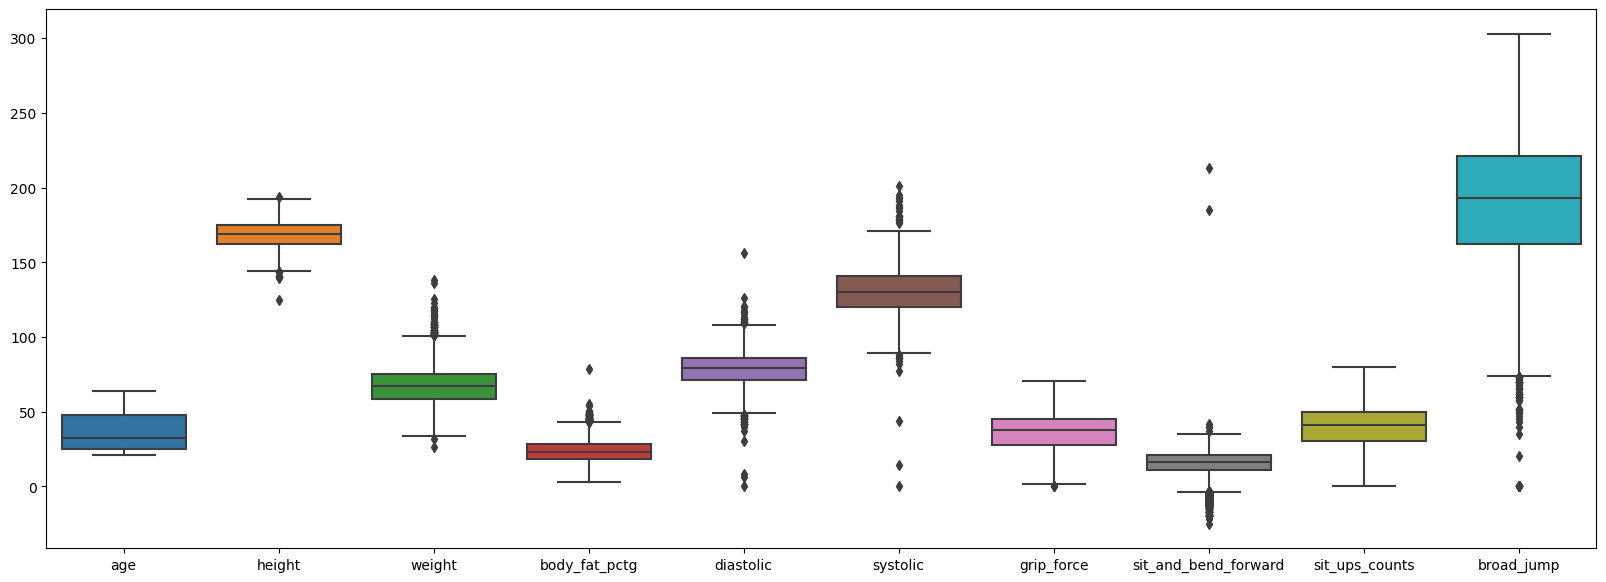

In [62]:
# Boxlot can plot outliers in data
plt.figure(figsize=(20, 7))
sns.boxplot(data=df)
plt.show()

### 7. Features Importance

1. Correlation heatmap

First, lets encode the classes where A (BEST) has the highest value compared to B (FIT), C (Normal), and D (Not good). The order is as follows:

#### A > B > C > D

In [63]:
mapping = {"D": 0, "C": 1, "B": 2, "A": 3}

# Apply the mapping to the 'class' column
df["class"] = df["class"].replace(mapping)

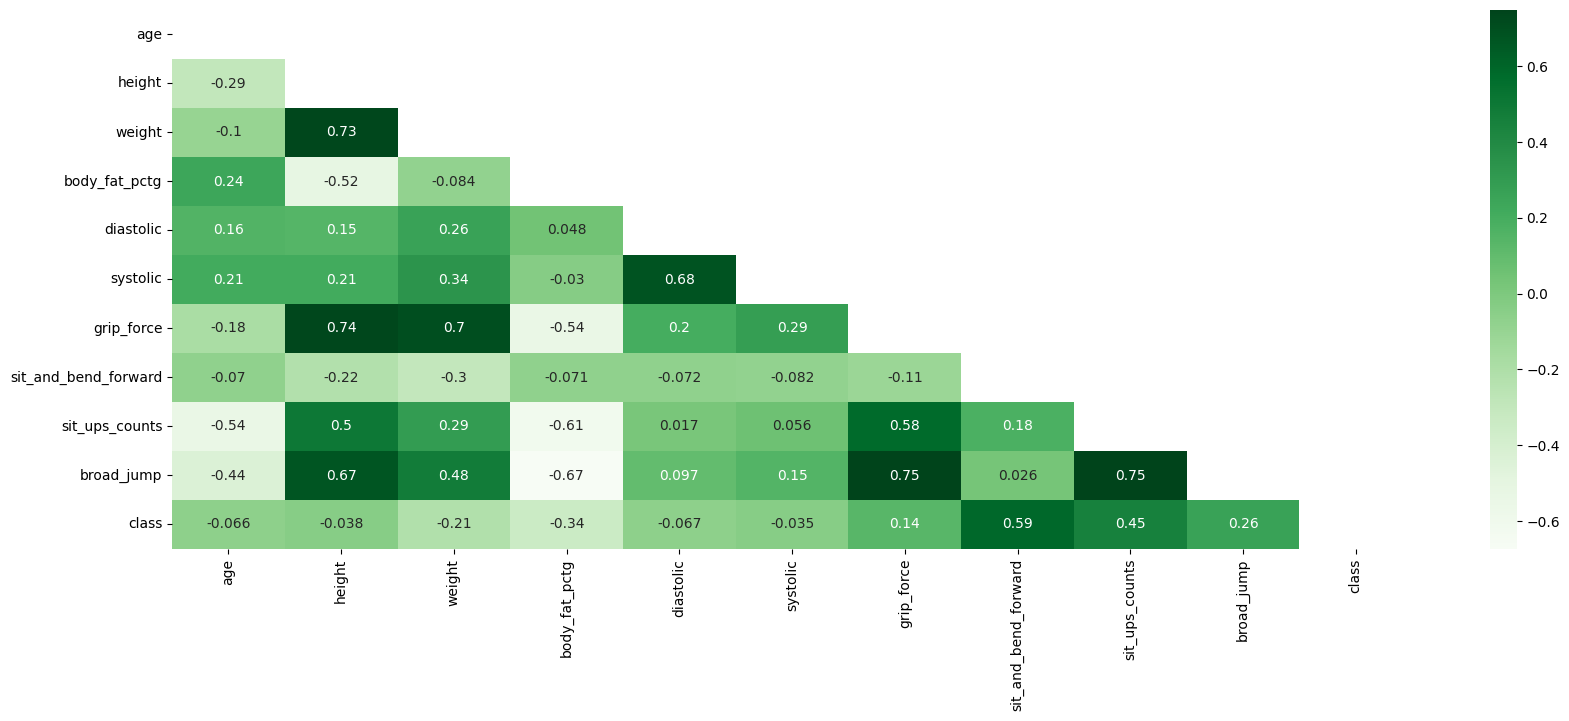

In [64]:
# plot the correlation heatmap
plt.figure(figsize=(20, 7))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), annot=True, mask=mask, cmap="Greens")
plt.show()

Most important features (in order):
1. Sit and bend forward
2. Sit-ups counts
3. Body fat percentage
4. Broad jump


Less important features:
1. Blood pressure measurements
2. Age
3. Height

2. Mutual Information

In [65]:
def calculate_mi(column, target):
    return mutual_info_score(column, target)


calculate_mi(df["gender"], df["class"])

0.004152138082299112

This low mutual information value suggests that there is very little to no dependence between the gender and class columns.

---
## 5 - Data Preprocessing

In [66]:
# df = df[["sit_and_bend_forward", "sit_ups_counts", "body_fat_pctg", "weight", "class"]]

### 1. Splitting Dataset

In [67]:
df_train, df_test = train_test_split(
    df, test_size=0.2, random_state=1, stratify=df["class"]
)

df_train, df_val = train_test_split(
    df_train, test_size=0.25, random_state=1, stratify=df_train["class"]
)

In [68]:
len(df_train), len(df_test), len(df_val)

(8035, 2679, 2679)

In [69]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [70]:
# Split between X (features) and y (target)
X_train = df_train.drop("class", axis=1)
y_train = df_train["class"]

X_test = df_test.drop("class", axis=1)
y_test = df_test["class"]

X_val = df_val.drop("class", axis=1)
y_val = df_val["class"]

In [71]:
print("X_Train Size : ", X_train.shape)
print("X_Test Size  : ", X_test.shape)
print("X_Val Size   : ", X_val.shape)
print("y_train :", y_train.shape)
print("y_test :", y_test.shape)
print("y_val :", y_val.shape)

X_Train Size :  (8035, 11)
X_Test Size  :  (2679, 11)
X_Val Size   :  (2679, 11)
y_train : (8035,)
y_test : (2679,)
y_val : (2679,)


### 2. Feature Encoding

In [72]:
# Get Numerical Columns and Categorical Columns
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=["object"]).columns.tolist()

print("Numerical Columns : ", num_columns)
print(
    "\n------------------------------------------------------------------------------------------\n"
)
print("Categorical Columns : ", cat_columns)

Numerical Columns :  ['age', 'height', 'weight', 'body_fat_pctg', 'diastolic', 'systolic', 'grip_force', 'sit_and_bend_forward', 'sit_ups_counts', 'broad_jump']

------------------------------------------------------------------------------------------

Categorical Columns :  ['gender']


In [73]:
train_dict = X_train[cat_columns + num_columns].to_dict(orient="records")

In [74]:
train_dict[0]

{'gender': 'F',
 'age': 29.0,
 'height': 159.0,
 'weight': 49.6,
 'body_fat_pctg': 33.1,
 'diastolic': 80.0,
 'systolic': 120.0,
 'grip_force': 23.4,
 'sit_and_bend_forward': 10.5,
 'sit_ups_counts': 26.0,
 'broad_jump': 138.0}

In [75]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [76]:
X_train = dv.transform(train_dict)

X_train.shape

(8035, 12)

In [77]:
dv.get_feature_names_out()

array(['age', 'body_fat_pctg', 'broad_jump', 'diastolic', 'gender=F',
       'gender=M', 'grip_force', 'height', 'sit_and_bend_forward',
       'sit_ups_counts', 'systolic', 'weight'], dtype=object)

In [78]:
val_dict = X_val[cat_columns + num_columns].to_dict(orient="records")
X_val = dv.transform(val_dict)

---

## 6. Model Training

In [79]:
# from sklearn.metrics import classification_report, accuracy_score
def accu_class(y_train, y_pred_train, y_test, y_pred_test):
    print("accuracy score - Train : ", accuracy_score(y_train, y_pred_train))
    print("accuracy score - Test  : ", accuracy_score(y_test, y_pred_test))
    print(
        "----------------------------------------------------------------------------"
    )
    print(
        "Classification Report - Train : \n",
        classification_report(y_train, y_pred_train),
        "\n",
    )
    print(
        "----------------------------------------------------------------------------"
    )
    print(
        "Classification Report - Test: \n",
        classification_report(y_test, y_pred_test),
        "\n",
    )

### 1. Logistic Regression

In [80]:
# Model definition
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [81]:
model_lr.predict(X_val)

array([2, 1, 0, ..., 1, 1, 3])

In [82]:
y_pred_train = model_lr.predict(X_train)
y_pred_val = model_lr.predict(X_val)

In [83]:
print("Accuracy on Train Set :", accuracy_score(y_train, y_pred_train))
print("Accuracy on Validation Set :", accuracy_score(y_val, y_pred_val))

Accuracy on Train Set : 0.6002489110143124
Accuracy on Validation Set : 0.6080627099664053


In [84]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76      2009
           1       0.51      0.52      0.51      2009
           2       0.46      0.42      0.44      2009
           3       0.65      0.71      0.68      2008

    accuracy                           0.60      8035
   macro avg       0.60      0.60      0.60      8035
weighted avg       0.60      0.60      0.60      8035



In [85]:
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       670
           1       0.52      0.50      0.51       670
           2       0.46      0.44      0.45       669
           3       0.66      0.70      0.68       670

    accuracy                           0.61      2679
   macro avg       0.61      0.61      0.61      2679
weighted avg       0.61      0.61      0.61      2679



### 2. Decision Tree

In [86]:
# initiate the Decision Tree algorithm
model_dtree = DecisionTreeClassifier()

model_dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [87]:
y_pred_train = model_dtree.predict(X_train)
y_pred_val = model_dtree.predict(X_val)

In [88]:
print("Accuracy on Train Set :", accuracy_score(y_train, y_pred_train))
print("Accuracy on Validation Set :", accuracy_score(y_val, y_pred_val))

Accuracy on Train Set : 1.0
Accuracy on Validation Set : 0.6379245987308697


In [89]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2009
           1       1.00      1.00      1.00      2009
           2       1.00      1.00      1.00      2009
           3       1.00      1.00      1.00      2008

    accuracy                           1.00      8035
   macro avg       1.00      1.00      1.00      8035
weighted avg       1.00      1.00      1.00      8035



In [90]:
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78       670
           1       0.57      0.60      0.59       670
           2       0.50      0.50      0.50       669
           3       0.69      0.67      0.68       670

    accuracy                           0.64      2679
   macro avg       0.64      0.64      0.64      2679
weighted avg       0.64      0.64      0.64      2679



### 3. Random Forest

In [91]:
# Model definition
model_rf = RandomForestClassifier()

model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [92]:
y_pred_train = model_rf.predict(X_train)
y_pred_val = model_rf.predict(X_val)

In [93]:
print("Accuracy on Train Set :", accuracy_score(y_train, y_pred_train))
print("Accuracy on Validation Set :", accuracy_score(y_val, y_pred_val))

Accuracy on Train Set : 1.0
Accuracy on Validation Set : 0.7260171705860395


In [94]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2009
           1       1.00      1.00      1.00      2009
           2       1.00      1.00      1.00      2009
           3       1.00      1.00      1.00      2008

    accuracy                           1.00      8035
   macro avg       1.00      1.00      1.00      8035
weighted avg       1.00      1.00      1.00      8035



In [95]:
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       670
           1       0.71      0.70      0.70       670
           2       0.61      0.54      0.58       669
           3       0.71      0.84      0.77       670

    accuracy                           0.73      2679
   macro avg       0.73      0.73      0.72      2679
weighted avg       0.73      0.73      0.72      2679



---

## 7. Hyperparameter Tuning

### 1. Logistic Regression

In [96]:
param_grid_lr = {
    "penalty": ["l1", "l2", "elasticnet", None],  # Regularization technique
    "C": [0.01, 0.1, 1, 10, 100],  # Regularization strength (inverse of λ)
    "solver": ["liblinear", "saga", "lbfgs"],  # Optimization algorithm
    "max_iter": [100, 200, 500],  # Maximum number of iterations
    "l1_ratio": [0.1, 0.5, 0.7, 1.0],  # Only used if penalty is elasticnet
}

grid_search_lr = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid_lr,
    scoring="accuracy",
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1,  # Use all available processors
)

# Fit the model to data
grid_search_lr.fit(X_train, y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/linear

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 1.0],
                         'max_iter': [100, 200, 500],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['liblinear', 'saga', 'lbfgs']},
             scoring='accuracy', verbose=1)

In [97]:
# Get Best Hyperparameters
grid_search_lr.best_params_

{'C': 0.1,
 'l1_ratio': 0.1,
 'max_iter': 500,
 'penalty': 'l2',
 'solver': 'lbfgs'}

In [98]:
# Get Best Estimator
lr_best = grid_search_lr.best_estimator_

In [99]:
y_pred_train_lr = lr_best.predict(X_train)
y_pred_val_lr = lr_best.predict(X_val)

In [100]:
# Check Performance Model against Train-Set
accu_class(y_train, y_pred_train_lr, y_val, y_pred_val_lr)

accuracy score - Train :  0.6051026757934038
accuracy score - Test  :  0.6140350877192983
----------------------------------------------------------------------------
Classification Report - Train : 
               precision    recall  f1-score   support

           0       0.77      0.76      0.77      2009
           1       0.52      0.52      0.52      2009
           2       0.46      0.42      0.44      2009
           3       0.66      0.72      0.69      2008

    accuracy                           0.61      8035
   macro avg       0.60      0.61      0.60      8035
weighted avg       0.60      0.61      0.60      8035
 

----------------------------------------------------------------------------
Classification Report - Test: 
               precision    recall  f1-score   support

           0       0.79      0.77      0.78       670
           1       0.52      0.52      0.52       670
           2       0.45      0.44      0.45       669
           3       0.69      0.72   

### 2. Decision Tree

In [101]:
param_grid_dt = {
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter": ["best", "random"],
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4, 6],
    "max_features": [None, "sqrt", "log2"],
    "max_leaf_nodes": [None, 10, 20, 50],
    "ccp_alpha": [0.0, 0.01, 0.1],
}

# Train with Random Search
random_search_dt = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(),
    param_distributions=param_grid_dt,
    n_iter=100,  # Number of combinations to sample
    cv=5,  # Cross-validation splits
    verbose=2,  # Verbosity level
    n_jobs=-1,  # Use all CPU cores
    random_state=42,
    scoring="accuracy",
)

random_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ccp_alpha=0.0, criterion=gini, max_depth=10, max_features=log2, max_leaf_nodes=50, min_samples_leaf=6, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END ccp_alpha=0.0, criterion=gini, max_depth=10, max_features=log2, max_leaf_nodes=50, min_samples_leaf=6, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END ccp_alpha=0.0, criterion=gini, max_depth=10, max_features=log2, max_leaf_nodes=50, min_samples_leaf=6, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END ccp_alpha=0.0, criterion=gini, max_depth=10, max_features=log2, max_leaf_nodes=50, min_samples_leaf=6, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=log_loss, max_depth=None, max_features=None, max_leaf_nodes=20, min_samples_leaf=6, min_samples_split=10, splitter=best; total time=   0.1s
[CV] END ccp_alpha=0.01, criterion=log_loss, max_depth=None, max_features=None, max_leaf_nodes

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'ccp_alpha': [0.0, 0.01, 0.1],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 5, 10, 15, 20],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'max_leaf_nodes': [None, 10, 20, 50],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   random_state=42, scoring='accuracy', verbose=2)

In [102]:
# Get Best Estimator
random_search_dt_best = random_search_dt.best_estimator_

In [103]:
y_pred_train_dt = random_search_dt_best.predict(X_train)
y_pred_val_dt = random_search_dt_best.predict(X_val)

In [104]:
# Check Performance Model against Train-Set
accu_class(y_train, y_pred_train_dt, y_val, y_pred_val_dt)

accuracy score - Train :  0.6578718108276291
accuracy score - Test  :  0.6390444195595372
----------------------------------------------------------------------------
Classification Report - Train : 
               precision    recall  f1-score   support

           0       0.81      0.77      0.79      2009
           1       0.67      0.49      0.56      2009
           2       0.53      0.52      0.53      2009
           3       0.63      0.85      0.73      2008

    accuracy                           0.66      8035
   macro avg       0.66      0.66      0.65      8035
weighted avg       0.66      0.66      0.65      8035
 

----------------------------------------------------------------------------
Classification Report - Test: 
               precision    recall  f1-score   support

           0       0.78      0.77      0.78       670
           1       0.66      0.46      0.54       670
           2       0.51      0.49      0.50       669
           3       0.61      0.84   

### 3. Random Forest

In [105]:
param_grid = {
    "n_estimators": [
        100,
        200,
        300,
    ],  # The number of trees in the forest (usually more is better, but overfitting can happen if too high)
    "max_depth": [
        10,
        20,
        30,
        None,
    ],  # Limit the depth of trees to avoid overly complex trees
    "min_samples_split": [
        2,
        5,
        10,
        20,
    ],  # Minimum samples required to split an internal node (higher values prevent overfitting)
    "min_samples_leaf": [
        1,
        2,
        4,
        10,
    ],  # Minimum samples required in each leaf node (higher values prevent overfitting)
    "max_features": [
        "auto",
        "sqrt",
        "log2",
        None,
    ],  # Limit the number of features considered at each split
    "max_samples": [
        None,
        0.8,
        0.9,
    ],  # Fraction of samples to train each tree on (None means use all samples)
    "bootstrap": [
        True,
        False,
    ],  # Whether to use bootstrap samples (True is generally better for preventing overfitting)
    "class_weight": [
        None,
        "balanced",
    ],  # Adjust the class weights if classes are imbalanced
}

param_grid

{'n_estimators': [100, 200, 300],
 'max_depth': [10, 20, 30, None],
 'min_samples_split': [2, 5, 10, 20],
 'min_samples_leaf': [1, 2, 4, 10],
 'max_features': ['auto', 'sqrt', 'log2', None],
 'max_samples': [None, 0.8, 0.9],
 'bootstrap': [True, False],
 'class_weight': [None, 'balanced']}

In [106]:
# Train with Random Search
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param_grid,
    n_iter=100,  # Number of combinations to sample
    cv=5,  # Cross-validation splits
    verbose=2,  # Verbosity level
    n_jobs=-1,  # Use all CPU cores
    random_state=42,
    scoring="accuracy",
)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, class_weight=balanced, max_depth=20, max_features=sqrt, max_samples=0.9, min_samples_leaf=1, min_samples_split=20, n_estimators=200; total time=   3.3s
[CV] END bootstrap=True, class_weight=balanced, max_depth=20, max_features=sqrt, max_samples=0.9, min_samples_leaf=1, min_samples_split=20, n_estimators=200; total time=   3.4s
[CV] END bootstrap=True, class_weight=balanced, max_depth=20, max_features=sqrt, max_samples=0.9, min_samples_leaf=1, min_samples_split=20, n_estimators=200; total time=   3.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=20, max_features=sqrt, max_samples=0.9, min_samples_leaf=1, min_samples_split=20, n_estimators=200; total time=   3.1s
[CV] END bootstrap=False, class_weight=balanced, max_depth=20, max_features=auto, max_samples=0.8, min_samples_leaf=2, min_samples_split=20, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, ma

/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past beha

[CV] END bootstrap=True, class_weight=balanced, max_depth=30, max_features=sqrt, max_samples=0.8, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   3.4s
[CV] END bootstrap=False, class_weight=None, max_depth=30, max_features=auto, max_samples=0.8, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=30, max_features=auto, max_samples=0.8, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=30, max_features=auto, max_samples=0.8, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=30, max_features=auto, max_samples=0.8, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=30, max_features=auto, max_samples=0.8, min_samples_leaf=4, min_samples_

/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=None, max_depth=20, max_features=None, max_samples=0.9, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=  13.6s
[CV] END bootstrap=True, class_weight=None, max_depth=20, max_features=None, max_samples=0.9, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=  13.7s


/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=30, max_features=auto, max_samples=0.8, min_samples_leaf=10, min_samples_split=20, n_estimators=200; total time=   4.0s


/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced, max_depth=None, max_features=log2, max_samples=None, min_samples_leaf=1, min_samples_split=20, n_estimators=200; total time=   8.1s


/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced, max_depth=None, max_features=log2, max_samples=None, min_samples_leaf=1, min_samples_split=20, n_estimators=200; total time=   8.3s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, max_features=sqrt, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, max_features=sqrt, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, max_features=sqrt, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, max_features=sqrt, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, max_features=sqrt, max_samples=0.8, mi

/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=None, max_features=log2, max_samples=0.9, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.8s


/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced, max_depth=20, max_features=log2, max_samples=None, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   2.3s
[CV] END bootstrap=False, class_weight=balanced, max_depth=20, max_features=log2, max_samples=None, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   2.4s


/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced, max_depth=20, max_features=log2, max_samples=None, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   2.4s
[CV] END bootstrap=False, class_weight=balanced, max_depth=20, max_features=log2, max_samples=None, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   2.4s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, max_features=log2, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, max_features=log2, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, max_features=log2, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, max_features=log2, max_samples=0.9, min_

/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced, max_depth=20, max_features=log2, max_samples=None, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   2.3s
[CV] END bootstrap=False, class_weight=balanced, max_depth=20, max_features=auto, max_samples=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   3.5s
[CV] END bootstrap=False, class_weight=balanced, max_depth=20, max_features=auto, max_samples=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   3.9s
[CV] END bootstrap=False, class_weight=balanced, max_depth=20, max_features=auto, max_samples=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   4.3s
[CV] END bootstrap=False, class_weight=balanced, max_depth=20, max_features=auto, max_samples=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   4.2s
[CV] END bootstrap=False, class_weight=balanced, max_depth=20, max_features=auto, max_samples=None, min_sampl

/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=None, max_depth=None, max_features=sqrt, max_samples=None, min_samples_leaf=10, min_samples_split=20, n_estimators=300; total time=   5.4s


/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=None, max_features=auto, max_samples=0.8, min_samples_leaf=2, min_samples_split=20, n_estimators=200; total time=   3.5s


/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=None, max_features=auto, max_samples=0.8, min_samples_leaf=2, min_samples_split=20, n_estimators=200; total time=   3.3s


/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=None, max_features=auto, max_samples=0.8, min_samples_leaf=2, min_samples_split=20, n_estimators=200; total time=   3.4s


/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=None, max_features=auto, max_samples=0.8, min_samples_leaf=2, min_samples_split=20, n_estimators=200; total time=   3.5s
[CV] END bootstrap=True, class_weight=balanced, max_depth=None, max_features=auto, max_samples=0.8, min_samples_leaf=2, min_samples_split=20, n_estimators=200; total time=   3.3s
[CV] END bootstrap=True, class_weight=None, max_depth=30, max_features=None, max_samples=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   5.1s
[CV] END bootstrap=True, class_weight=None, max_depth=30, max_features=None, max_samples=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   5.3s
[CV] END bootstrap=False, class_weight=balanced, max_depth=10, max_features=None, max_samples=None, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=  21.1s
[CV] END bootstrap=True, class_weight=None, max_depth=30, max_features=None, max_samples=None, min_samples_leaf=4, 

/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=None, max_features=None, max_samples=0.9, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=  16.5s


/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced, max_depth=None, max_features=None, max_samples=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   8.5s


/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced, max_depth=None, max_features=None, max_samples=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   8.7s
[CV] END bootstrap=True, class_weight=None, max_depth=10, max_features=auto, max_samples=0.8, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   2.9s


/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=None, max_depth=10, max_features=auto, max_samples=0.8, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   2.7s
[CV] END bootstrap=True, class_weight=None, max_depth=10, max_features=auto, max_samples=0.8, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   2.8s
[CV] END bootstrap=True, class_weight=None, max_depth=10, max_features=auto, max_samples=0.8, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   2.7s
[CV] END bootstrap=True, class_weight=None, max_depth=10, max_features=auto, max_samples=0.8, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   2.7s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, max_features=None, max_samples=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   9.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, max_features=None, max_samples=None, min_samples_leaf=2, min_sampl

/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=None, max_depth=30, max_features=log2, max_samples=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   9.2s


/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=None, max_depth=10, max_features=auto, max_samples=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   2.1s


/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=None, max_depth=10, max_features=auto, max_samples=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   2.1s
[CV] END bootstrap=True, class_weight=None, max_depth=20, max_features=None, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  11.2s


/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=None, max_depth=20, max_features=None, max_samples=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  11.1s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, max_features=log2, max_samples=0.9, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, max_features=log2, max_samples=0.9, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, max_features=log2, max_samples=0.9, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, max_features=log2, max_samples=0.9, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, max_features=log2, max_samples=0.9, min_sam

/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=balanced, max_depth=20, max_features=sqrt, max_samples=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   3.8s


/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=None, max_depth=30, max_features=None, max_samples=0.8, min_samples_leaf=4, min_samples_split=20, n_estimators=100; total time=   5.2s


/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=None, max_depth=30, max_features=None, max_samples=0.8, min_samples_leaf=4, min_samples_split=20, n_estimators=100; total time=   4.3s
[CV] END bootstrap=True, class_weight=None, max_depth=30, max_features=None, max_samples=0.8, min_samples_leaf=4, min_samples_split=20, n_estimators=100; total time=   4.5s


/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=None, max_depth=30, max_features=None, max_samples=0.8, min_samples_leaf=4, min_samples_split=20, n_estimators=100; total time=   4.3s
[CV] END bootstrap=False, class_weight=balanced, max_depth=30, max_features=auto, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=30, max_features=auto, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=30, max_features=auto, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=30, max_features=auto, max_samples=0.9, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=30, max_features=auto, max_samples=0.9, min_samples_leaf=1, 

/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=None, max_depth=None, max_features=log2, max_samples=None, min_samples_leaf=4, min_samples_split=20, n_estimators=200; total time=   5.7s


/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=None, max_depth=30, max_features=auto, max_samples=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   3.9s
[CV] END bootstrap=True, class_weight=None, max_depth=30, max_features=auto, max_samples=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   3.8s


/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=None, max_depth=30, max_features=auto, max_samples=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   4.0s
[CV] END bootstrap=True, class_weight=None, max_depth=30, max_features=auto, max_samples=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   4.0s
[CV] END bootstrap=False, class_weight=None, max_depth=10, max_features=auto, max_samples=0.9, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=10, max_features=auto, max_samples=0.9, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s


/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=None, max_depth=10, max_features=auto, max_samples=0.9, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=10, max_features=auto, max_samples=0.9, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=10, max_features=auto, max_samples=0.9, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s


/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=None, max_depth=30, max_features=auto, max_samples=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   3.7s


/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=20, max_features=auto, max_samples=None, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   5.9s


/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=20, max_features=None, max_samples=None, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=  19.7s


/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=20, max_features=None, max_samples=None, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=  19.1s


/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=20, max_features=auto, max_samples=None, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   6.9s
[CV] END bootstrap=False, class_weight=balanced, max_depth=30, max_features=log2, max_samples=0.9, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=30, max_features=log2, max_samples=0.9, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=30, max_features=log2, max_samples=0.9, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=30, max_features=log2, max_samples=0.9, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=30, max_features=log2, max_samples=0.9, min_samples_

/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=20, max_features=auto, max_samples=None, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   6.6s
[CV] END bootstrap=True, class_weight=balanced, max_depth=None, max_features=sqrt, max_samples=0.8, min_samples_leaf=10, min_samples_split=20, n_estimators=300; total time=   4.8s


/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=None, max_features=sqrt, max_samples=0.8, min_samples_leaf=10, min_samples_split=20, n_estimators=300; total time=   4.8s
[CV] END bootstrap=True, class_weight=balanced, max_depth=None, max_features=sqrt, max_samples=0.8, min_samples_leaf=10, min_samples_split=20, n_estimators=300; total time=   4.7s


/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=None, max_features=sqrt, max_samples=0.8, min_samples_leaf=10, min_samples_split=20, n_estimators=300; total time=   4.8s
[CV] END bootstrap=True, class_weight=None, max_depth=30, max_features=auto, max_samples=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   4.0s
[CV] END bootstrap=True, class_weight=balanced, max_depth=None, max_features=sqrt, max_samples=0.8, min_samples_leaf=10, min_samples_split=20, n_estimators=300; total time=   4.7s
[CV] END bootstrap=True, class_weight=None, max_depth=30, max_features=auto, max_samples=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   4.2s
[CV] END bootstrap=True, class_weight=None, max_depth=30, max_features=auto, max_samples=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   4.2s
[CV] END bootstrap=True, class_weight=balanced, max_depth=10, max_features=sqrt, max_samples=0.9, min_samples_leaf=1, 

/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=None, max_depth=10, max_features=log2, max_samples=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   2.2s
[CV] END bootstrap=False, class_weight=None, max_depth=10, max_features=log2, max_samples=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   2.2s


/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, class_weight=None, max_depth=10, max_features=log2, max_samples=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   2.2s


/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=None, max_depth=10, max_features=auto, max_samples=0.8, min_samples_leaf=10, min_samples_split=20, n_estimators=100; total time=   1.3s
[CV] END bootstrap=True, class_weight=None, max_depth=10, max_features=auto, max_samples=0.8, min_samples_leaf=10, min_samples_split=20, n_estimators=100; total time=   1.2s
[CV] END bootstrap=False, class_weight=None, max_depth=10, max_features=log2, max_samples=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   2.0s
[CV] END bootstrap=False, class_weight=None, max_depth=10, max_features=log2, max_samples=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   2.0s
[CV] END bootstrap=True, class_weight=None, max_depth=10, max_features=auto, max_samples=0.8, min_samples_leaf=10, min_samples_split=20, n_estimators=100; total time=   1.2s
[CV] END bootstrap=True, class_weight=None, max_depth=10, max_features=auto, max_samples=0.8, min_samples_leaf=10, min_samples_s

/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=30, max_features=sqrt, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END bootstrap=True, class_weight=balanced, max_depth=30, max_features=sqrt, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.0s


/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=30, max_features=sqrt, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END bootstrap=True, class_weight=balanced, max_depth=30, max_features=sqrt, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END bootstrap=False, class_weight=None, max_depth=20, max_features=auto, max_samples=0.8, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=20, max_features=auto, max_samples=0.8, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=20, max_features=auto, max_samples=0.8, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=20, max_features=auto, max_samples=0.8, min_samples_leaf=10, min_sample

/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=30, max_features=sqrt, max_samples=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END bootstrap=True, class_weight=None, max_depth=None, max_features=auto, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   3.4s
[CV] END bootstrap=True, class_weight=None, max_depth=None, max_features=auto, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   3.5s
[CV] END bootstrap=True, class_weight=None, max_depth=None, max_features=auto, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.9s
[CV] END bootstrap=True, class_weight=None, max_depth=None, max_features=auto, max_samples=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.8s
[CV] END bootstrap=True, class_weight=None, max_depth=None, max_features=auto, max_samples=0.8, min_samples_leaf=1, min_samples_

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [None, 'balanced'],
                                        'max_depth': [10, 20, 30, None],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'max_samples': [None, 0.8, 0.9],
                                        'min_samples_leaf': [1, 2, 4, 10],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='accuracy', verbose=2)

### Best parameter

In [107]:
# Get Best Hyperparameters
random_search.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_samples': None,
 'max_features': 'log2',
 'max_depth': 20,
 'class_weight': None,
 'bootstrap': False}

In [108]:
# Get Best Estimator
random_search_rf_best = random_search.best_estimator_

In [109]:
y_pred_train = random_search_rf_best.predict(X_train)
y_pred_val = random_search_rf_best.predict(X_val)

In [110]:
# Check Performance Model against Train-Set
accu_class(y_train, y_pred_train, y_val, y_pred_val)

accuracy score - Train :  0.9853142501555694
accuracy score - Test  :  0.730869727510265
----------------------------------------------------------------------------
Classification Report - Train : 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99      2009
           1       0.99      0.98      0.98      2009
           2       0.99      0.99      0.99      2009
           3       0.97      1.00      0.98      2008

    accuracy                           0.99      8035
   macro avg       0.99      0.99      0.99      8035
weighted avg       0.99      0.99      0.99      8035
 

----------------------------------------------------------------------------
Classification Report - Test: 
               precision    recall  f1-score   support

           0       0.90      0.81      0.85       670
           1       0.72      0.70      0.71       670
           2       0.61      0.55      0.58       669
           3       0.71      0.86    

Although Random forest is still overfitting, it is the better model at the moment. So, we will use it for our final model.

---

In [ ]:
import pickle

with open("body_performance_model.bin", "rb") as f_in:
    dv, model = pickle.load(f_in)

In [116]:
data = {
    "age": 25,
    "gender": "male",
    "height": 170,
    "weight": 70,
    "body_fat": 15,
    "diastolic": 80,
    "systolic": 120,
    "grip_force": 50,
    "sit_and_bend_forward": 20,
    "sit_ups_counts": 30,
    "broad_jump": 200,
}


def predict(df, dv, model):
    dicts = df.to_dict(orient="records")
    X = dv.transform(dicts)
    y_pred = model.predict(X)
    return y_pred


y_pred = predict(pd.DataFrame(data, index=[0]), dv, model)
print(y_pred[0])

D


In [119]:
import requests

URL = "http://127.0.0.1:5000/predict"

requests.post(URL, json=data).json()

{'code': 200, 'result': {'class': 'D'}, 'status': 'OK'}

with docker

In [125]:
URL = "http://0.0.0.0:9696/predict"

r = requests.post(URL, json=data)

res = r.json()

res["result"]["class"]

'D'